In [20]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [36]:
df = pd.read_excel('world_cup_results.xlsx')
df.head(15)

,Year,Date,Time,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,1930-07-13,15:00,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico,
1,1930,1930-07-13,15:00,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium,
2,1930,1930-07-14,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil,
3,1930,1930-07-14,14:50,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru,
4,1930,1930-07-15,16:00,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France,
5,1930,1930-07-16,14:45,Group 1,Parque Central,Montevideo,Uruguay,Chile,3,0,Mexico,
6,1930,1930-07-17,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,4,0,Bolivia,
7,1930,1930-07-17,14:45,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Paraguay,
8,1930,1930-07-18,14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,Uruguay,1,0,Peru,
9,1930,1930-07-19,12:50,Group 1,Estadio Centenario,Montevideo,Uruguay,Chile,1,0,France,


In [39]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation',
       'match_goals'],
      dtype='object')

In [31]:
df.groupby("HomeTeam")['HomeGoals'].sum().sort_values().tail(10)

HomeTeam
Sweden         53
England        54
Uruguay        62
France         68
Germany        69
Hungary        73
Germany FR     99
Italy          99
Argentina     111
Brazil        180
Name: HomeGoals, dtype: int64

In [38]:
df['match_goals'] = df['HomeGoals']+df["AwayGoals"]
df.head()


,Year,Date,Time,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,match_goals
0,1930,1930-07-13,15:00,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico,,5
1,1930,1930-07-13,15:00,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium,,3
2,1930,1930-07-14,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil,,3
3,1930,1930-07-14,14:50,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru,,4
4,1930,1930-07-15,16:00,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France,,1


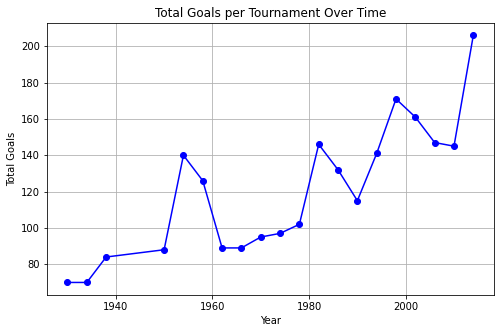

In [40]:
# Group the data by "Year" and calculate the sum of "match_goals" for each year
total_goals_per_year = df.groupby("Year")["match_goals"].sum()

# Create a line chart
plt.figure(figsize=(8, 5))
total_goals_per_year.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.title("Total Goals per Tournament Over Time")

# Display the line chart
plt.grid()
plt.show()

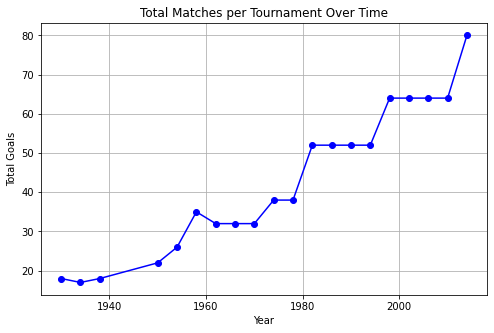

In [43]:
total_matches_per_tournament = df.groupby("Year")['Date'].count()
plt.figure(figsize=(8, 5))
total_matches_per_tournament.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.title("Total Matches per Tournament Over Time")

# Display the line chart
plt.grid()
plt.show()